In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('D:/MKCE-20220504T065310Z-001/0.MKCE/Datasets/HR_comma_sep.csv')
print(data.head())
print(data)

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [16]:
print(data.info())
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB
None


(14999, 9)

In [4]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

(array([1335.,  498.,  477., 1778., 1471., 1775., 1768., 2115., 1998.,
        1784.]),
 array([0.09 , 0.181, 0.272, 0.363, 0.454, 0.545, 0.636, 0.727, 0.818,
        0.909, 1.   ]),
 <BarContainer object of 10 artists>)

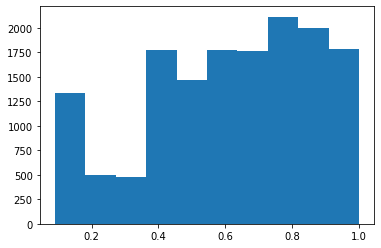

In [5]:
plt.hist(data['satisfaction_level'])

In [8]:
#plt.boxplot(data['number_project'],data['time_spend_company'])

In [14]:
data.drop('Department',inplace=True,axis=1)

In [15]:
print(data)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [83]:
Y=data['left']

X=data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]

In [84]:
from sklearn.model_selection import train_test_split

X=X.values
Y=Y.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [96]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(11999, 7)
(3000, 7)
(11999,)
(3000,)


In [85]:
X

array([[0.38, 0.53, 2.  , ..., 3.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 6.  , 0.  , 0.  ],
       [0.11, 0.88, 7.  , ..., 4.  , 0.  , 0.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 3.  , 0.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 4.  , 0.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 3.  , 0.  , 0.  ]])

In [86]:
Y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [87]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
y_pred=model.predict(X_test)

In [105]:
model.predict_proba(X_test)

array([[0.77966461, 0.22033539],
       [0.96270632, 0.03729368],
       [0.92975632, 0.07024368],
       ...,
       [0.86449727, 0.13550273],
       [0.73550254, 0.26449746],
       [0.81168304, 0.18831696]])

In [106]:
X_test

array([[0.54, 0.67, 3.  , ..., 2.  , 0.  , 0.  ],
       [0.72, 0.52, 3.  , ..., 4.  , 1.  , 0.  ],
       [0.95, 0.61, 3.  , ..., 2.  , 0.  , 0.  ],
       ...,
       [0.87, 0.91, 4.  , ..., 5.  , 0.  , 0.  ],
       [0.49, 0.71, 3.  , ..., 2.  , 0.  , 0.  ],
       [0.52, 0.66, 5.  , ..., 3.  , 0.  , 0.  ]])

In [113]:
print(Y_testT)

[0 0 0 ... 1 0 0]


In [107]:
#to measure Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [108]:
print(accuracy_score(Y_test,Y_pred))

0.76


In [109]:
print(confusion_matrix(Y_test,Y_pred))

[[2118  173]
 [ 547  162]]


In [110]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2291
           1       0.48      0.23      0.31       709

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.58      3000
weighted avg       0.72      0.76      0.73      3000

